### Compute gene correlation from dependency scores (from DepMap)

In [7]:
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pandarallel import pandarallel
import seaborn as sns

pandarallel.initialize(progress_bar=True)
tqdm.pandas()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
df_corr = pd.read_csv("/work/magroup/kaileyhu/datasets/depmap/NSM_EXP.csv")

In [3]:
a = df_corr.sample(10000)

In [4]:
a.set_index("Unnamed: 0", inplace = True)

In [5]:
a_flat = a.values.flatten()

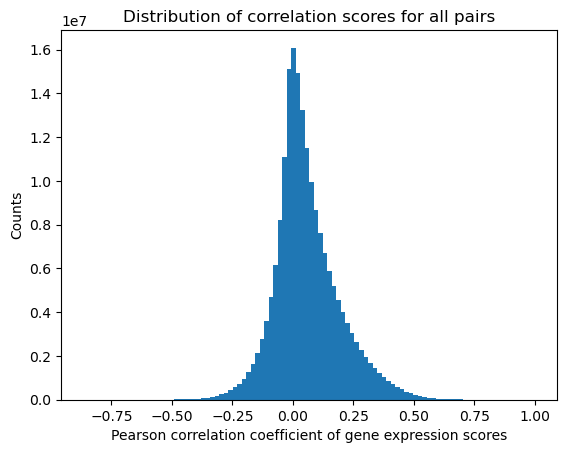

In [48]:
plt.figure()
plt.hist(a_flat, bins = 100)
plt.xlabel("Pearson correlation coefficient of gene expression scores")
plt.ylabel("Counts")
plt.title("Distribution of correlation scores for all pairs")
plt.savefig('all.png', dpi = 100)
plt.show()

In [8]:
with open ("/work/magroup/kaileyhu/datasets/SynLethDB/all_pairs_dict.pkl", "rb") as f:
    pair_list = pkl.load(f)

In [10]:
df_corr.set_index("Unnamed: 0", inplace = True)

In [11]:
df_corr.index = list(map(lambda x : x.split(' ')[0], df_corr.index))
df_corr.columns = list(map(lambda x : x.split(' ')[0], df_corr.columns))

In [13]:
sl_corr = []
nonsl_corr = []
failed = []
for ((k1, k2), v) in tqdm(pair_list.items()):
    try:
        corr_val = df_corr.loc[k1][k2]
    except:
        failed.append(((k1, k2), v))
        continue
    if v:
        sl_corr.append(corr_val)
    else:
        nonsl_corr.append(corr_val)

  0%|          | 0/35943 [00:00<?, ?it/s]

In [ ]:
SL = sl_corr
# 'non_SL' (Computational labels) - right peak
non_SL = nonsl_corr
# 'all' (Complete dataset) - broad/center peak, a mix
all_data = a_flat

# --- 2. Create the Plot using Matplotlib and Seaborn ---
plt.figure(figsize=(7, 6))

# Define colors and labels
plot_data = [
    {'data': SL, 'label': 'Known SL pairs', 'color': '#F4A460'}, # Orange/Red
    {'data': all_data, 'label': 'All pairs', 'color': '#6495ED'},                   # Blue
    {'data': non_SL, 'label': 'Known non-SL pairs', 'color': '#9ACD32'}            # Green
]

# The order of plotting is reversed: [Green, Blue, Orange]
for item in reversed(plot_data):
    sns.kdeplot(
        # FIXED: Pass the data as a positional argument.
        item['data'],  
        label=item['label'],
        color=item['color'],
        fill=True,
        alpha=0.4, 
        linewidth=1.5,
        cut=0,
        ax=plt.gca()
    )

# --- 3. Customizations (Axes, Title, Legend, and Styling) ---

# Set X-axis limits and ticks
plt.xlim(-1.0, 1.0)
plt.xticks(np.arange(-1.0, 1.01, 0.25))
plt.xlabel('Correlation coefficient', fontsize=12)

# Set Y-axis limits and ticks
plt.ylim(0, 5.0)
plt.yticks(np.arange(0, 5.01, 0.5))
plt.ylabel('Frequency', fontsize=12)

# Title and 'F' label
plt.title('Distribution of gene expression correlation coefficients\nfrom different source labels', loc='center', fontsize=14)
# plt.text(-1.0, 3.2, 'F', fontsize=20, fontweight='bold')

# Legend styling
plt.legend(
    frameon=False,
    loc='upper right',
    bbox_to_anchor=(0.5, 0.95),
    fontsize=10
)

# Remove the default top and right spines
sns.despine()
plt.savefig('superimposed.png', dpi=100)
plt.show()

In [24]:
plt.savefig('superimposed.png', dpi=100)

<Figure size 640x480 with 0 Axes>

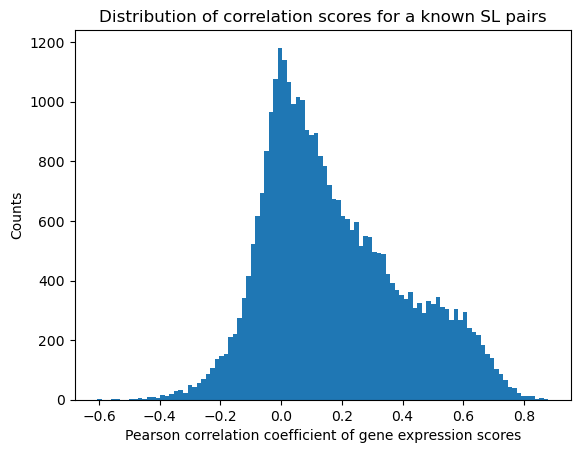

In [40]:
plt.hist(sl_corr, bins = 100)
plt.xlabel("Pearson correlation coefficient of gene expression scores")
plt.ylabel("Counts")
plt.title("Distribution of correlation scores for a known SL pairs")
plt.savefig('known_SL.png', dpi = 100)
plt.show()

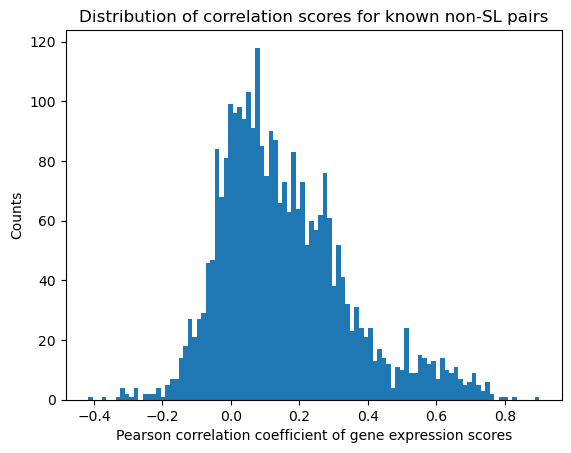

In [41]:
plt.hist(nonsl_corr, bins = 100)
plt.xlabel("Pearson correlation coefficient of gene expression scores")
plt.ylabel("Counts")
plt.title("Distribution of correlation scores for known non-SL pairs")
plt.savefig('known_non_SL.png', dpi = 100)
plt.show()

In [3]:
df_corr.set_index('Unnamed: 0', inplace = True)

In [4]:
df_corr.index = list(map(lambda x : x.split(' ')[0], df_corr.index))
df_corr.columns = list(map(lambda x : x.split(' ')[0], df_corr.columns))

In [5]:
corr_list = []

def list_row(row):
    res = set()
    for i in row.index:
        if i >= row.name:
            res.add((row.name, i, row[i]))
        else:
            res.add((i, row.name, row[i]))
    return res

df_corr['set'] = df_corr.progress_apply(list_row, axis = 1)

  0%|          | 0/19193 [00:00<?, ?it/s]

In [ ]:
with open ("/work/magroup/kaileyhu/datasets/SynLethDB/all_pairs_dict.pkl", "rb") as f:
    pair_list = pkl.load(f)

In [6]:
sl_corr = []
nonsl_corr = []
failed = []
for ((k1, k2), v) in pair_list.items():
    try:
        corr_val = df_corr.loc[k1][k2]
    except:
        failed.append(((k1, k2), v))
        continue
    if v:
        sl_corr.append(corr_val)
    else:
        nonsl_corr.append(corr_val)

NameError: name 'pair_list' is not defined

### old corr mat generation 

In [ ]:
df = pd.read_csv("/work/magroup/kaileyhu/datasets/depmap/CRISPRGeneDependency.csv")

In [3]:
df_protein_genes = pd.read_csv("/work/magroup/kaileyhu/datasets/depmap/OmicsExpressionProteinCodingGenesTPMLogp1.csv")

In [4]:
df_protein_genes.shape

(1479, 19194)

In [5]:
df_protein_genes.set_index("Unnamed: 0", inplace = True)
corr_mat_exp = df_protein_genes.corr()

In [6]:
corr_mat_exp.to_csv("/work/magroup/kaileyhu/datasets/depmap/NSM_EXP.csv")

In [9]:
corr_mat = corr_mat_exp

In [2]:
corr_mat = pd.read_csv("/work/magroup/kaileyhu/datasets/depmap/NSM_EXP.csv")

In [4]:
corr_mat.set_index("Unnamed: 0", inplace = True)
corr_mat.index = list(map(lambda x : x.split(' ')[0], corr_mat.index))
corr_mat.columns = list(map(lambda x : x.split(' ')[0], corr_mat.columns))

In [6]:
corr_dict = corr_mat.to_dict()

In [9]:
res = set()
for (k, v) in tqdm(corr_dict.items()):
    for (k2, v2) in v.items():
        if k < k2:
            res.add((k, k2, v2))
        else:
            res.add((k2, k, v2))

  0%|          | 0/19193 [00:00<?, ?it/s]

In [ ]:
sorted_items = sorted(res, key=lambda item: item[2])

In [14]:
all_genes = set(corr_mat.index)

In [16]:
includes_all = []
genes_missing = all_genes.copy()
for i, (g1, g2, corr) in tqdm(enumerate(sorted_items)):
    if len(genes_missing) == 0:
        break
    if g1 in genes_missing or g2 in genes_missing:
        genes_missing.discard(g1)
        genes_missing.discard(g2)
        includes_all.append((g1, g2, corr))

0it [00:00, ?it/s]

In [19]:
with open ("/work/magroup/kaileyhu/datasets/depmap/sampling/nsm_exp_hits_all.pkl", "wb") as f:
    pkl.dump(includes_all, f)

In [2]:
with open ("/work/magroup/kaileyhu/datasets/SynLethDB/all_pairs_dict.pkl", "rb") as f:
    pair_list = pkl.load(f)

In [3]:
with open ("/work/magroup/kaileyhu/datasets/depmap/sampling/nsm_exp_hits_all.pkl", "rb") as f:
    includes_all = pkl.load(f)

In [4]:
with open ("/work/magroup/kaileyhu/datasets/depmap/sampling/nsm_exp_sorted.pkl", "rb") as f:
    sorted_items = pkl.load(f)

In [5]:
# extract SL pairs
pos_pairs = {key: value for key, value in pair_list.items() if value}

In [7]:
num_pos = len(pos_pairs)

In [11]:
num_neg = len(pair_list) - num_pos

In [ ]:
for i, (g1, g2, corr) in tqdm(enumerate(sorted_items)):
    if i < 650000:
        continue
    if (g1, g2, corr) in includes_all:
        continue
    if len(includes_all) + num_neg >= 50 * num_pos:
        break
    includes_all.append((g1, g2, corr))

0it [00:00, ?it/s]

In [13]:
np.average([corr for (_, _, corr) in sorted_items])

0.05876584391475778

In [ ]:
with open ("/work/magroup/kaileyhu/datasets/depmap/sampling/nsm_exp_sorted.pkl", "wb") as f:
    pkl.dump(sorted_items, f)

In [ ]:
pos_pairs

In [ ]:
for (g1, g2, _) in includes_all:
    pair_list[(g1, g2)] = False

In [ ]:
len(pair_list)

In [ ]:
with open ("/work/magroup/kaileyhu/datasets/SynLethSampled/all_pairs_NSP_EXP_50x.pkl", "wb") as f:
    pkl.dump(pair_list, f)

### NSM DEP

In [4]:
df.set_index("Unnamed: 0", inplace = True)

In [5]:
corr_mat = df.corr()

In [7]:
corr_mat.to_csv("/work/magroup/kaileyhu/datasets/depmap/NSM_DEP.csv")

In [13]:
with open ("/work/magroup/kaileyhu/datasets/SynLethDB/all_pairs_dict.pkl", "rb") as f:
    pair_list = pkl.load(f)

In [10]:
corr_mat.index = list(map(lambda x : x.split(' ')[0], corr_mat.index))
corr_mat.columns = list(map(lambda x : x.split(' ')[0], corr_mat.columns))

In [14]:
sl_corr = []
nonsl_corr = []
failed = []
for ((k1, k2), v) in pair_list.items():
    try:
        corr_val = corr_mat.loc[k1][k2]
    except:
        failed.append(((k1, k2), v))
        continue
    if v:
        sl_corr.append(corr_val)
    else:
        nonsl_corr.append(corr_val)

In [15]:
np.average(sl_corr)

0.17249384127094833

In [16]:
np.average(nonsl_corr)

0.15606800027156276

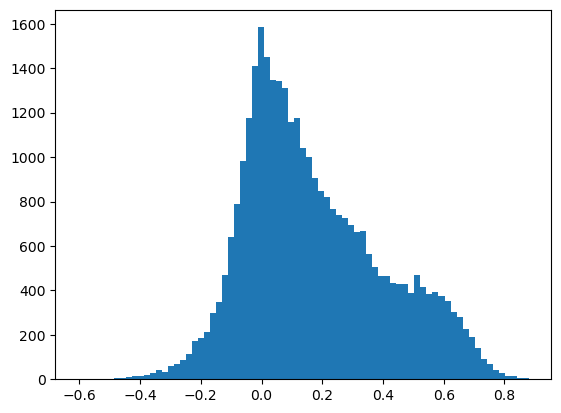

In [17]:
plt.hist(sl_corr, bins='auto') 
plt.show()

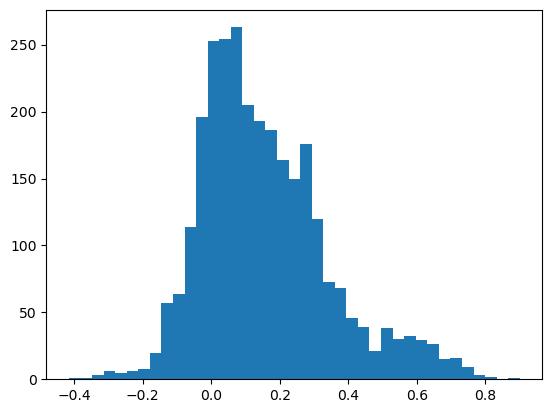

In [18]:
plt.hist(nonsl_corr, bins='auto') 
plt.show()

In [19]:
all_corr = corr_mat.values.flatten().tolist()

In [ ]:
plt.hist(all_corr, bins='auto') 
plt.show()